In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os.path import join
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import random
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# For description dataset
# If target value =0 it is cosidered as normal
# If it is 1 it is cosidered as outliers

In [2]:
df = pd.read_csv(join("data",'train_reuter_877_44_1.csv'),header=None)
test = pd.read_csv(join("data",'test_reuter_877_44_1.csv'),header=None)

# feature name 변환
columns = [f"w{i}" for i in range(len(df.columns)-1)]
columns.append('is_normal')

# feature name 적용
df.columns = columns
test.columns = columns

# # 마지막 label is_abnormal column 제거
# data = df.iloc[:,:-1]
# label = df.iloc[:,[-1]]

# #테스트데이터도 마지막 colum 제거 후 레이블만 따로 뻄
# test_data = test.iloc[:,:-1]
# test_label = test.iloc[:,[-1]]


# # 기존은 0이 정상 1이 이상치 변경 0->1.  1->-1 
# #테스트데이터 적용
# test_label = test_label.replace(1,-1)
# test_label = test_label.replace(0,1)

# #train data 작용
# label = label.replace(0,1)


# Using all 44 closest features

In [64]:
x_data = df.iloc[:,:-1]
x_label = df.iloc[:,[-1]]

test_data = test.iloc[:,:-1]
test_label = test.iloc[:,[-1]]

In [65]:
x_data.shape , x_label.shape , test_data.shape,test_label.shape

((2923, 44), (2923, 1), (4903, 44), (4903, 1))

In [66]:
clf = IsolationForest()
clf.fit(x_data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [67]:
test_predict = clf.predict(test_data)
test_score = clf.score_samples(test_data)

In [68]:
test_predict

array([ 1,  1,  1, ...,  1, -1,  1])

In [69]:
test_score

array([-0.42056359, -0.39825165, -0.41908221, ..., -0.40641744,
       -0.53113814, -0.42521709])

# Roc curve and auc using 44 features

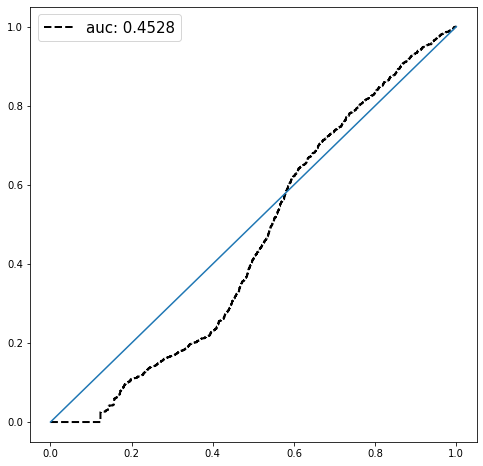

In [70]:
roc_score = roc_auc_score(test_label,-test_score)
roc_score = round(roc_score,4)


fpr,tpr,thresholds = roc_curve(test_label , -test_score)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,'k--' , lw=2 , label="auc: " + str(roc_score))
plt.plot([0,1],[0,1])
plt.legend(prop={"size":15})

# 5/3 mon

In [4]:
df.head(10)

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w35,w36,w37,w38,w39,w40,w41,w42,w43,is_normal
0,0.80564,1.03990,1.05160,1.06240,1.06300,1.07220,1.08180,1.09360,1.09570,1.09600,...,1.14010,1.14030,1.14110,1.14120,1.1419,1.1436,1.1438,1.1438,1.1441,0
1,0.94974,0.95941,1.00590,1.00800,1.03210,1.03550,1.04340,1.04350,1.05560,1.05700,...,1.10190,1.10480,1.10550,1.10550,1.1059,1.1070,1.1082,1.1102,1.1117,0
2,0.49153,0.65380,0.70683,0.70803,0.81065,0.85390,0.85520,0.87345,0.90402,0.91982,...,1.10650,1.10660,1.10890,1.11180,1.1139,1.1176,1.1198,1.1212,1.1214,0
3,0.35153,0.58909,0.73177,0.73334,0.77836,0.82453,0.83517,0.83915,0.85313,0.86826,...,0.98292,0.98389,0.99304,0.99457,1.0001,1.0041,1.0050,1.0153,1.0186,0
4,0.65377,0.96085,0.96292,0.98122,0.98278,0.99948,0.99996,1.00170,1.01250,1.01920,...,1.09060,1.09160,1.09200,1.09420,1.0952,1.0973,1.1003,1.1013,1.1013,0
5,0.92654,0.98616,1.03620,1.05940,1.06530,1.06680,1.06810,1.07280,1.07380,1.07510,...,1.13430,1.13520,1.13780,1.13820,1.1397,1.1412,1.1413,1.1416,1.1420,0
6,0.52838,0.85345,0.88262,0.89068,0.91130,0.97044,0.99184,1.00280,1.00460,1.02240,...,1.11960,1.12420,1.12470,1.12870,1.1294,1.1296,1.1320,1.1352,1.1378,0
7,0.49038,0.78243,0.87752,0.89555,0.91822,0.92213,0.97251,0.97571,0.99286,1.01250,...,1.08450,1.08510,1.08800,1.08860,1.0889,1.0897,1.0898,1.0901,1.0905,0
8,0.57544,1.03560,1.04940,1.06900,1.07500,1.07540,1.08100,1.10100,1.10340,1.10620,...,1.14700,1.14840,1.14900,1.14960,1.1501,1.1501,1.1501,1.1505,1.1547,0
9,0.87647,0.98766,1.04660,1.06610,1.07250,1.07470,1.07630,1.08020,1.08360,1.09470,...,1.14360,1.14380,1.14390,1.14410,1.1456,1.1471,1.1476,1.1476,1.1484,0


In [5]:
test.head(10)

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w35,w36,w37,w38,w39,w40,w41,w42,w43,is_normal
0,0.97991,1.01000,1.01940,1.03150,1.04060,1.04140,1.05170,1.05260,1.05750,1.05910,...,1.12260,1.12430,1.12780,1.12850,1.13020,1.13110,1.13160,1.13170,1.13200,0
1,1.01620,1.03950,1.06380,1.06990,1.07140,1.07310,1.08030,1.08830,1.09280,1.09390,...,1.13900,1.13930,1.13930,1.13970,1.13980,1.14080,1.14090,1.14170,1.14180,0
2,0.60862,0.82739,0.99245,1.02610,1.04590,1.05530,1.06520,1.06710,1.07060,1.07230,...,1.13190,1.13440,1.13470,1.13510,1.13540,1.13590,1.13700,1.13720,1.13740,0
3,0.70297,0.70757,0.74352,0.76824,0.77195,0.77231,0.77900,0.78616,0.78716,0.80642,...,0.94988,0.95567,0.96688,0.96896,0.96974,0.97394,0.98057,0.98068,0.98395,0
4,0.47175,0.57037,0.57271,0.59937,0.62022,0.66500,0.70362,0.70989,0.71614,0.73446,...,0.90973,0.91392,0.91958,0.92932,0.92988,0.93011,0.93094,0.93243,0.94316,0
5,1.01860,1.04340,1.04770,1.05370,1.05790,1.06470,1.07050,1.07140,1.08640,1.08690,...,1.13400,1.13540,1.13560,1.13860,1.13880,1.13910,1.13930,1.13930,1.13980,0
6,0.76961,0.88180,0.89195,1.03410,1.03480,1.04030,1.05720,1.06110,1.06190,1.06220,...,1.12210,1.12310,1.12530,1.12540,1.12550,1.12700,1.12810,1.12820,1.13120,0
7,0.53260,0.58735,0.60052,0.65264,0.67675,0.73041,0.74301,0.79187,0.82350,0.85148,...,1.11140,1.11520,1.11620,1.12610,1.13010,1.13080,1.13240,1.13310,1.13360,0
8,0.75531,0.77715,0.79101,0.81013,0.87943,0.87967,0.92126,0.92252,0.94857,0.97633,...,1.07220,1.07330,1.07640,1.07680,1.07780,1.07830,1.07830,1.07880,1.08130,0
9,0.78784,1.04920,1.05060,1.06130,1.06800,1.07200,1.08200,1.08600,1.08710,1.09420,...,1.14280,1.14330,1.14370,1.14440,1.14560,1.14780,1.14900,1.15060,1.15360,0


# Extracting only 2 closest features

In [71]:
train = df.iloc[:,:2]
train_label = df.iloc[:,[-1]]
test_data = test.iloc[:,:2]
test_label = test.iloc[:,[-1]]

In [72]:
forest = IsolationForest()

In [73]:
forest.fit(train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [74]:
test_predict = forest.predict(test_data)
test_score = forest.score_samples(test_data)

In [75]:
test_score

array([-0.59113199, -0.59565494, -0.4867967 , ..., -0.59549652,
       -0.65375142, -0.61481224])

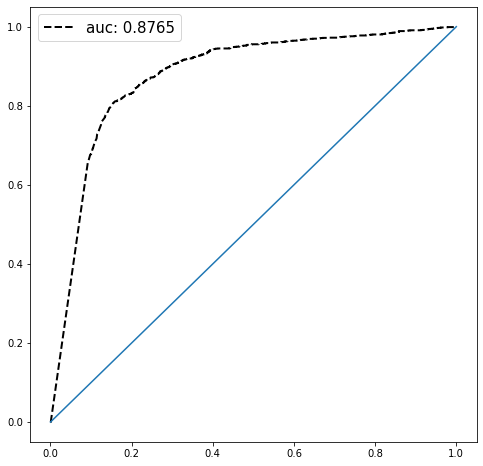

In [76]:
roc_score = roc_auc_score(test_label, -test_score)
roc_score = round(roc_score,4)


fpr,tpr,thresholds = roc_curve(test_label , -test_score)

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,'k--' , lw=2 , label="auc: " + str(roc_score))
plt.plot([0,1],[0,1])
plt.legend(prop={"size":15})